In [5]:
# !pip install the_well[benchmark]

In [2]:
# Uncomment and run the following line to install the_well
# !pip install the_well[benchmark]

import matplotlib.pyplot as plt
import numpy as np
import torch
from einops import rearrange
from neuralop.models import FNO
from tqdm import tqdm

from the_well.benchmark.metrics import VRMSE
from the_well.data import WellDataset
from the_well.data.normalization import (  # noqa: F401
    RMSNormalization,
    ZScoreNormalization,
)
from the_well.utils.download import well_download


device = "cuda"
base_path = "./datasets"  # path/to/storage


import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [38]:
# Downloading the DataSet

# well_download(base_path=base_path, dataset="active_matter", split="train")
# well_download(base_path=base_path, dataset="active_matter", split="valid")

In [6]:
# Loading the DataSet

dataset = WellDataset(
    well_base_path=f"{base_path}/datasets",
    well_dataset_name="active_matter",
    well_split_name="valid",
    n_steps_input=81,
    n_steps_output=0,
    use_normalization=False,
)

In [39]:
# Check items ormat of the dataset

item = dataset[0]

list(item.keys())

['input_fields',
 'constant_scalars',
 'boundary_conditions',
 'space_grid',
 'input_time_grid']

In [58]:
field_names = [    name for group in dataset.metadata.field_names.values() for name in group]

n = 3
x_data = dataset[n]['input_fields']

print(f'Number of simulation repetitions: {len(dataset)}', end='\n\n')
print(f'Size of each repetition: {x.shape}', end='\n\n')
print(f'Field names: {field_names}')

Number of simulation repetitions: 24

Size of each repetition: (32,)

Field names: ['concentration', 'velocity_x', 'velocity_y', 'D_xx', 'D_xy', 'D_yx', 'D_yy', 'E_xx', 'E_xy', 'E_yx', 'E_yy']


In [18]:
# Example data: 3D array (n_frames, height, width)
data = x_data[:,:,:,0]

# Create figure and first image
fig, ax = plt.subplots()
im = ax.imshow(data[0], cmap='viridis_r', origin='lower',
               vmin=data.min(), vmax=data.max())
ax.set_title("Frame 0")

# Update function
def update(frame):
    im.set_array(data[frame])
    ax.set_title(f"Frame {frame}")
    return [im]

# Create animation
ani = FuncAnimation(fig, update, frames=len(data), interval=100, blit=True)

plt.close(fig)
ani.save('./results/Concentration_repetition_3.gif', writer='pillow', fps=10)
# Display animation inline in Jupyter
HTML(ani.to_jshtml())


KeyboardInterrupt: 

3
0: [105  56]
1: [37  6]
2: [72 98]
3: [95 99]
4: [127  78]
5: [ 6 87]
6: [127  88]
7: [123  81]
8: [105  31]
9: [ 0 67]


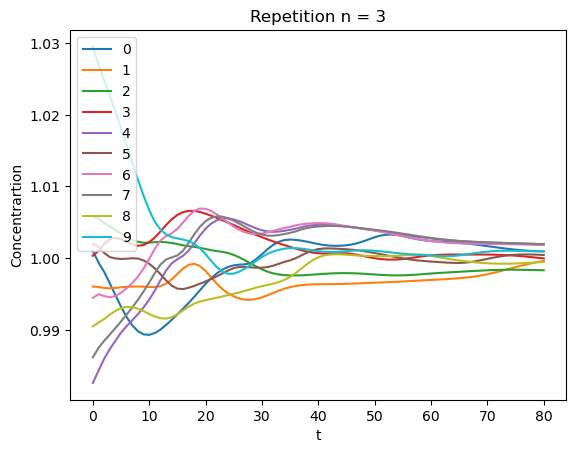

In [ ]:
n = 3
# n = np.random.randint(24)
print(n)
x_data = dataset[n]['input_fields']

plt.figure()
for i in range(10):
    point = np.random.randint(128,size=2)
    print(f'{i}: {point}')
    plt.plot(x_data[:, point[0], point[1], 0], label=str(i))
plt.xlabel(r't')
plt.ylabel(r'Concentrartion')
plt.title("Repetition n = 3")
plt.legend()
plt.savefig('./results/Concentration_repetition_3')
plt.show()
plt.close()